In [10]:
import pandas as pd

# IMPORTAÇÃO DA TABELA COMÉRCIO EXTERNO DE ENERGIA

In [11]:
bigdf = pd.read_excel("../databases/Dados EPE/Comércio Externo de Energia.xlsx", usecols='A:BB')

# CRIAÇÃO DE UM DICIONÁRIO PARA ARMAZENAR MÚLTIPLOS DATAFRAMES


In [12]:
dict_a = {
    'EVOLUÇÃO DA DEPENDÊNCIA EXTERNA DE ENERGIA': bigdf[1:11].transpose().reset_index(drop=True),
    'EVOLUÇÃO DA DEPENDÊNCIA EXTERNA DE PETRÓLEO': bigdf[18:33].transpose().reset_index(drop=True),
    'IMPORTAÇÕES DE ENERGIA' : bigdf[42:63].transpose().reset_index(drop=True),
    'EVOLUÇÃO DAS EXPORTAÇÕES DE ENERGIA': bigdf[70:91].transpose().reset_index(drop=True),
    'EVOLUÇÃO DAS EXPORTAÇÕES E/OU IMPORTAÇÕES LÍQUIDAS' : bigdf[96:115].transpose().reset_index(drop=True)
    }




# REALIZAÇÃO DA LIMPEZA PARA CADA DATAFRAME DENTRO DO DICIONÁRIO

In [13]:
dict_comercio_externo = {}
for i in dict_a:

    #retirar colunas nulas
    df = dict_a[i]
    df.dropna(axis='columns', how='all', inplace=True)

    #transformar a primeira linha em header
    headers = [str(v).strip() for v in df.iloc[0].values]
    headers[0] = 'ANO'
    headers = pd.Series(headers)
    df.columns = headers
    df.drop(index=0, axis=0, inplace=True)

    #transformar a primeira coluna em inteiro
    df['ANO'] = df['ANO'].map(lambda x: int(x))

dict_comercio_externo = dict_a

In [19]:
dict_comercio_externo['IMPORTAÇÕES DE ENERGIA']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 1 to 53
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ANO                             53 non-null     int64 
 1   PETRÓLEO                        53 non-null     object
 2   GÁS NATURAL                     53 non-null     object
 3   CARVÃO METALÚRGICO / VAPOR      53 non-null     object
 4   COQUE DE CARVÃO MINERAL         53 non-null     object
 5   URÂNIO                          53 non-null     object
 6   ELETRICIDADE                    53 non-null     object
 7   ÁLCOOL ETÍLICO1                 53 non-null     object
 8   LENHA / CARVÃO VEGETAL          53 non-null     object
 9   SUBTOTAL DERIVADOS DE PETRÓLEO  53 non-null     object
 10  ÓLEO DIESEL                     53 non-null     object
 11  ÓLEO COMBUSTÍVEL                53 non-null     object
 12  GASOLINA                        53 non-null     obje

<Axes: >

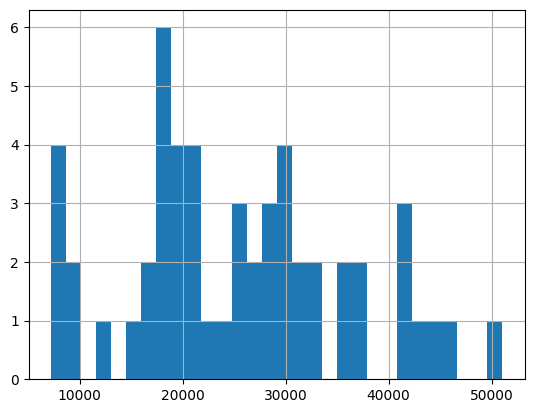

In [ ]:
# dict_a['IMPORTAÇÕES DE ENERGIA']["PETRÓLEO"].hist(bins=30)